El presente codigo muestra el movimiento de un objeto, la cual tiene presente la fuerza de magnus y la fuerza de fricion  cuadratica.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import linspace
from mpl_toolkits import mplot3d

In [2]:
# define la solucion de la ecuacion diferencial
def euler(g,Cd,Cm,Vox,Voy,Voz,Wx,Wy,Wz,Xo,Yo,Zo,tmin,tmax,Deltat,funx,funy,funz):
    # tiempo y cantidad de puntos
    N = (tmax - tmin)/Deltat
    t = linspace(tmin,tmax,int(N))
    #velodidad
    vx = np.zeros(len(t))
    vy = np.zeros(len(t))
    vz = np.zeros(len(t))
    # posicion
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    # condiciones iniciales
    x[0] = Xo
    y[0] = Yo
    z[0] = Zo
    
    vx[0] = Vox
    vy[0] = Voy
    vz[0] = Voz
    
    for i in range(len(t)-1):
        
        Vx = vx[i]
        Vy = vy[i]
        Vz = vz[i]
        #evaluacion de las funciones
        acel1 = float(eval(funx))
        acel2 = float(eval(funy))
        acel3 = float(eval(funz))
        #valor de la velicidad
        vx[i+1] = vx[i] + Deltat*acel1
        vy[i+1] = vy[i] + Deltat*acel2
        vz[i+1] = vz[i] + Deltat*acel3
        #valor de la posicion
        x[i+1] = x[i] + Deltat*vx[i]
        y[i+1] = y[i] + Deltat*vy[i]
        z[i+1] = z[i] + Deltat*vz[i]
        
    return(t,x,y,z)

In [3]:
#parametros de entradad, sistema internacional(SI)
g = 9.8 # m/S2
M = 0.149 #kg
Cd = 0
Cm = 0
# parametros iniciales
Vo = 5
wo = 200
Xo = 0
Yo = 0
Zo = 0
# angulos de cosenos directores
alpha = 0*np.pi/180
beta = 90*np.pi/180
gamma = 90*np.pi/180
# volicidad para cada base ortogonal
Vx = Vo*np.cos(alpha)
Vy = Vo*np.cos(beta)
Vz = Vo*np.cos(gamma)
# angulos cosenos directores para W
alphaw = 90*np.pi/180
betaw = 0*np.pi/180
gammaw = 90*np.pi/180
# frecuencia angular para cada base ortogonal
Wx = wo*np.cos(alphaw)
Wy = wo*np.cos(betaw)
Wz = wo*np.cos(gammaw)


# intervalo temporal
tmin = 0
tmax = 2*Vo/g
N = 300
Deltat = (tmax-tmin)/N
# ecuacion diferencial acoplada que deine el movimiento
funx = '-Cd*((Vx**2+Vy**2+Vz**2)**0.5)*Vx+Cm*(Wy*Vz-Wz*Vy)'
funy = '-Cd*((Vx**2+Vy**2+Vz**2)**0.5)*Vy+Cm*(Wz*Vx-Wx*Vz)'
funz = '-g-Cd*((Vx**2+Vy**2+Vz**2)**0.5)*Vz+Cm*(Wx*Vy-Wy*Vx)'
# solucion de la ecuacion diferencial
(t,x,y,z) = euler(g,Cd,Cm,Vx,Vy,Vz,Wx,Wy,Wz,Xo,Yo,Zo,tmin,tmax,Deltat,funx,funy,funz)

Text(0.5, 0, 'y')

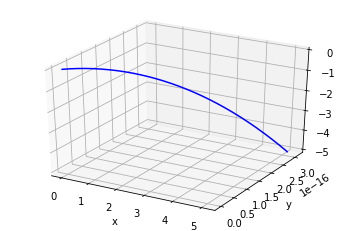

In [7]:
# grafica tridimencional
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z,'blue')
plt.xlabel('x')
plt.ylabel('y')

In [8]:
# para una velocidad inicial de 40m/s y una posicion en z de 1.8m
# con fuerza de arrastre cuadratico cuya constante cd = 6e-3
g = 9.8 # m/S2
M = 0.149 #kg
Cd = 6e-3
Cm = 0

Vo = 40
alpha = 2.2*np.pi/180#86.30*np.pi/180
beta = 90*np.pi/180
gamma = 87.8*np.pi/180#13.70*np.pi/180
Vx = Vo*np.cos(alpha)
Vy = Vo*np.cos(beta)
Vz = Vo*np.cos(gamma)
##########################
wo = 200
alphaw = 90*np.pi/180
betaw = 0*np.pi/180
gammaw = 90*np.pi/180
Wx = wo*np.cos(alphaw)
Wy = wo*np.cos(betaw)
Wz = wo*np.cos(gammaw)
##########################
Xo = 0
Yo = 0
Zo = 1.8

tmin = 0
tmax = 0.45#8.06#2*Vo/g
N = 100
Deltat = (tmax-tmin)/N

funx = '-Cd*((Vx**2+Vy**2+Vz**2)**0.5)*Vx+Cm*(Wy*Vz-Wz*Vy)'
funy = '-Cd*((Vx**2+Vy**2+Vz**2)**0.5)*Vy+Cm*(Wz*Vx-Wx*Vz)'
funz = '-g+Cd*((Vx**2+Vy**2+Vz**2)**0.5)*Vz+Cm*(Wx*Vy-Wy*Vx)'

(t,x,y,z) = euler(g,Cd,Cm,Vx,Vy,Vz,Wx,Wy,Wz,Xo,Yo,Zo,tmin,tmax,Deltat,funx,funy,funz)

Text(0.5, 0, 'y')

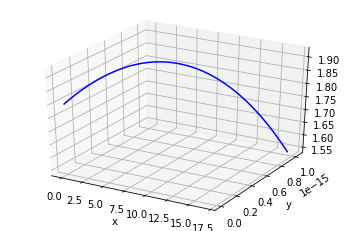

In [10]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z,'blue')
plt.xlabel('x')
plt.ylabel('y')